# <center>Multiple View Geometry</center>
## <center> Obtaining and drawing epipolar lines from a pair of images</center>

## Introduction
In a two camera system that views a 3D scene, each camera from diferent positions, there are some relation between the 3D points and their projections in the 2D image planes. If we have a **left** and a **right** view of the same scene, we can find the point **p** in **left** view that its projection must belong to a line **l** in the **right** view. That line **l** is called **epipolar line**. If we obtain a set of points from both views we can draw the corresponding set of epipolar lines on the other view. All the epipolar lines in one view intersect in one point called the **epipole**. That point represents the projection in the image plane of the optical center of the other view.

The relationship in image coordinates between the both views can be described by the fundamental matrix **F**. We can obtain the fundamental matrix from the intrinsec parameters of the cameras or by estimating it based on corresponding points in both views. In our case, we do not know the intrinsec paramenters of the cameras, so we are goint to estimate the fundamental matrix.

### Training image

In [1]:
import numpy as np
import cv2
from visio_per_computador.common import geometry
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
#%matplotlib notebook 

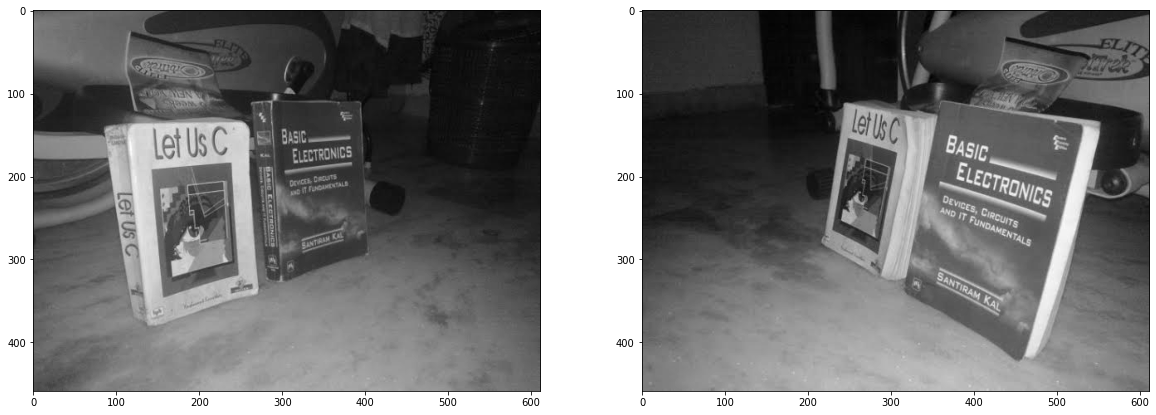

In [2]:
img1 = cv2.imread('../../in/epipolar/left.jpg',0)  #queryimage # left image
img2 = cv2.imread('../../in/epipolar/right.jpg',0) #trainimage # right image
plt.subplot(121),plt.imshow(img1, cmap='gray')
plt.subplot(122),plt.imshow(img2, cmap='gray')
plt.show()

As we have stated before, we do not know the intrinsec paramenters of the camera that took the photos above, so in order to estimate the fundamental matrix we must obtain corresponding points from both images. We can either manually select the points or use a feature detection and matching algorithm to obtain the set of corresponding points. Theoretically, the fundamental matrix has 7 degrees of freedom, so it would be enough with only 7 corresponding points in order to estimate our fundamental matrix, but the estimation is very sensitive to the accuracy of the points selected. That is because we will be using far more that 7 points and to do so we are goint to use SIFT as our feature detector.  


In [3]:
# find the keypoints and descriptors with SIFT
kp1, desc1 = geometry.get_kp_desc(method='sift', img=img1)
kp2, desc2 = geometry.get_kp_desc(method='sift', img=img2)

#calculate matches
matches = geometry.match_descriptors(method="BF_k", desc1=desc1, desc2=desc2, k=2)

#Filter the matches
matches = geometry.filter_matches(method="KNN", matches=matches, proportion=0.95)
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match[0].queryIdx].pt
    points2[i, :] = kp2[match[0].trainIdx].pt

We have used a high value of proportion as we saw that it get better results. As the estimation is very sensitive to incorrect matching points, we need a proportion of good points much bigger than bad points and if we are very restrictive in the filtering we may elminate good points.    
Once we have our set of correspoing points we can estimate the fundamental matrix **F** with **cv2.findFuntamentlMat()**. We are using the RANSAC algorithm to compute the fundamental matrix. OpenCV offers 3 more methods 7-point algorithm, 8-point algorithm and least-median algorithm(LMEDS)[1]. Although, in both LMEDS and RANSAC is used the 7-point algortihm they apply a method to try to get rid off outliers that are generated from incorrect matching points. The points selected to estimate the fundamental matrix are represented by *mask*.

In [4]:
F, mask = cv2.findFundamentalMat(points1,points2,cv2.FM_RANSAC)
# We select only inlier points
points1 = points1[mask.ravel()==1]
points2 = points2[mask.ravel()==1]

Finally, with the estimation of the fundamental matrix and the corresponding points we can draw the epipolar lines on both images. We use **cv2.computeCorrespointEpilines()** to compute the epilines and **geometry.draw_epipolar_lines()** to draw them. 

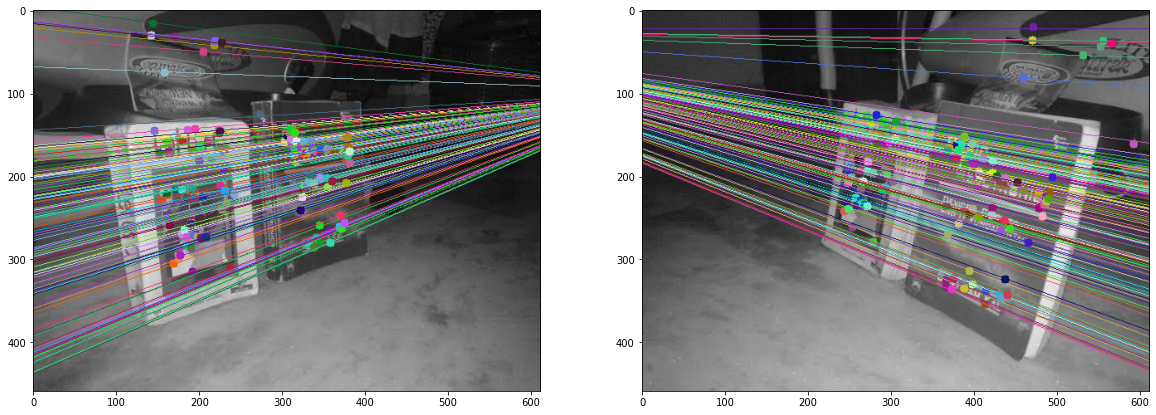

In [5]:
# Find the epipolar lines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(points2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = geometry.draw_epipolar_lines(img1,img2,lines1,points1,points2)
# Find the epipolar lines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(points1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = geometry.draw_epipolar_lines(img2,img1,lines2,points2,points1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

## Epipolar lines with other perspectives

### Image 1

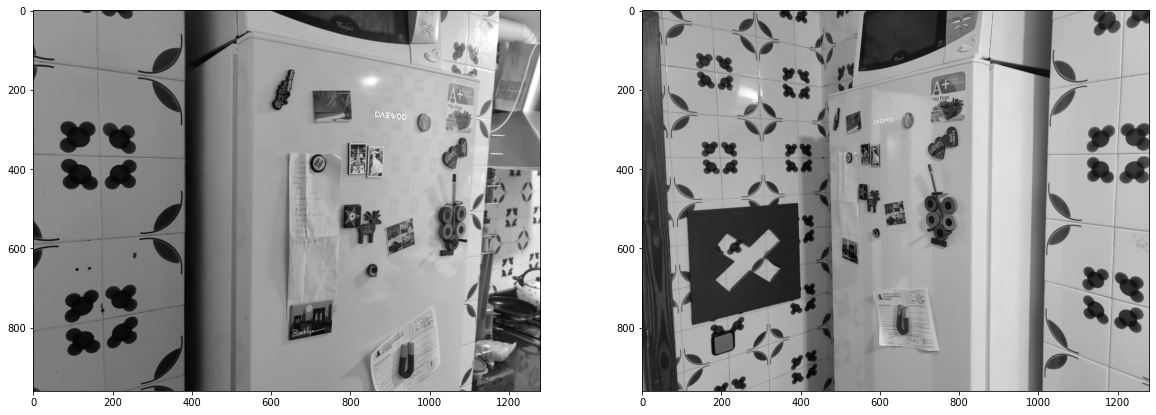

In [6]:
img1_2 = cv2.imread('../../in/epipolar/left2.jpg',0)  #queryimage # left image
img2_2 = cv2.imread('../../in/epipolar/right2.jpg',0) #trainimage # right image
plt.subplot(121),plt.imshow(img1_2, cmap='gray')
plt.subplot(122),plt.imshow(img2_2, cmap='gray')
plt.show()

In [7]:
# find the keypoints and descriptors with SIFT
kp1_2, desc1_2 = geometry.get_kp_desc(method='sift', img=img1_2)
kp2_2, desc2_2 = geometry.get_kp_desc(method='sift', img=img2_2)

#calculate matches
matches_2 = geometry.match_descriptors(method="BF_k", desc1=desc1_2, desc2=desc2_2, k=2)

#Filter the matches
matches_2 = geometry.filter_matches(method="KNN", matches=matches_2, proportion=0.74)
points1_2 = np.zeros((len(matches_2), 2), dtype=np.float32)
points2_2 = np.zeros((len(matches_2), 2), dtype=np.float32)
for i, match in enumerate(matches_2):
    points1_2[i, :] = kp1_2[match[0].queryIdx].pt
    points2_2[i, :] = kp2_2[match[0].trainIdx].pt

In [8]:
F_2, mask_2 = cv2.findFundamentalMat(points1_2,points2_2,cv2.FM_RANSAC)
# We select only inlier points
points1_2 = points1_2[mask_2.ravel()==1]
points2_2 = points2_2[mask_2.ravel()==1]

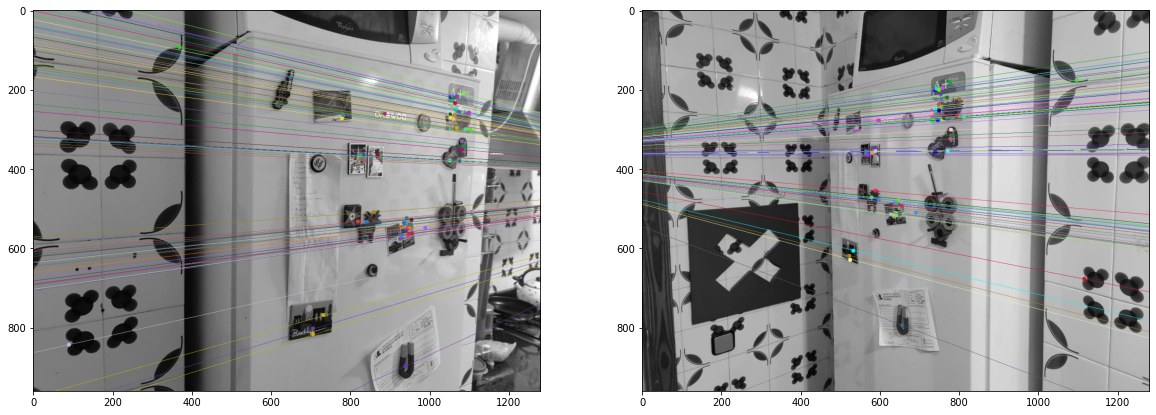

In [9]:
# Find the epipolar lines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1_2 = cv2.computeCorrespondEpilines(points2_2.reshape(-1,1,2), 2,F_2)
lines1_2 = lines1_2.reshape(-1,3)
img5_2,img6_2 = geometry.draw_epipolar_lines(img1_2,img2_2,lines1_2,points1_2,points2_2)
# Find the epipolar lines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2_2 = cv2.computeCorrespondEpilines(points1_2.reshape(-1,1,2), 1,F_2)
lines2_2 = lines2_2.reshape(-1,3)
img3_2,img4_2 = geometry.draw_epipolar_lines(img2_2,img1_2,lines2_2,points2_2,points1_2)
plt.subplot(121),plt.imshow(img5_2)
plt.subplot(122),plt.imshow(img3_2)
plt.show()

### Image 2

This image is not a *left* and right *image* but a *close* and *far* view of the same scene. With this pair of images we expect to obtain the epipolar lines intersection inside the image. We proceed the same as before: get corresponding points, estimate the fundamental matrix, draw the epipolar lines.

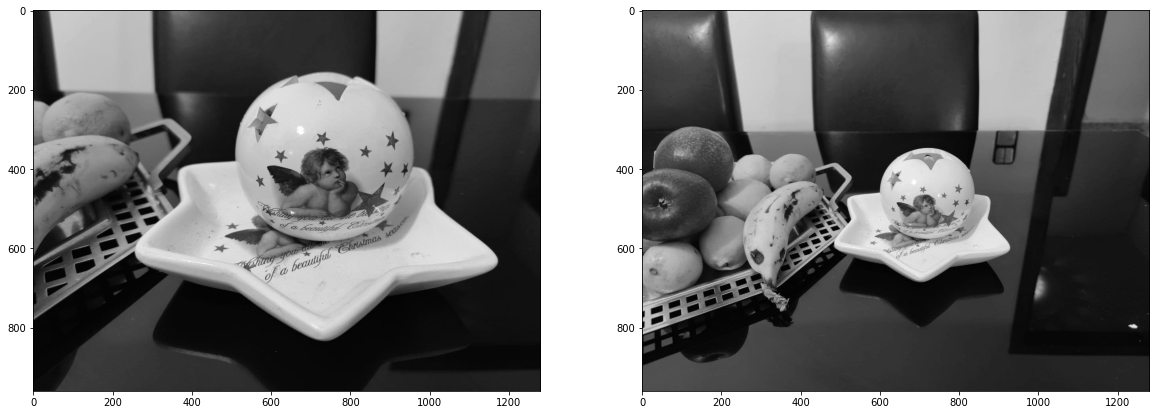

In [10]:
img1_3 = cv2.imread('../../in/epipolar/close.jpg',0) 
img2_3 = cv2.imread('../../in/epipolar/far.jpg',0) 
plt.subplot(121),plt.imshow(img1_3, cmap='gray')
plt.subplot(122),plt.imshow(img2_3, cmap='gray')
plt.show()


In [11]:
# find the keypoints and descriptors with SIFT
kp1_3, desc1_3 = geometry.get_kp_desc(method='sift', img=img1_3)
kp2_3, desc2_3 = geometry.get_kp_desc(method='sift', img=img2_3)

#calculate matches
matches_3 = geometry.match_descriptors(method="BF_k", desc1=desc1_3, desc2=desc2_3, k=2)

#Filter the matches
matches_3 = geometry.filter_matches(method="KNN", matches=matches_3, proportion=0.91)
points1_3 = np.zeros((len(matches_3), 2), dtype=np.float32)
points2_3 = np.zeros((len(matches_3), 2), dtype=np.float32)
for i, match in enumerate(matches_3):
    points1_3[i, :] = kp1_3[match[0].queryIdx].pt
    points2_3[i, :] = kp2_3[match[0].trainIdx].pt


In [12]:
F_3, mask_3 = cv2.findFundamentalMat(points1_3,points2_3,cv2.FM_RANSAC)
# We select only inlier points
points1_3 = points1_3[mask_3.ravel()==1]
points2_3 = points2_3[mask_3.ravel()==1]

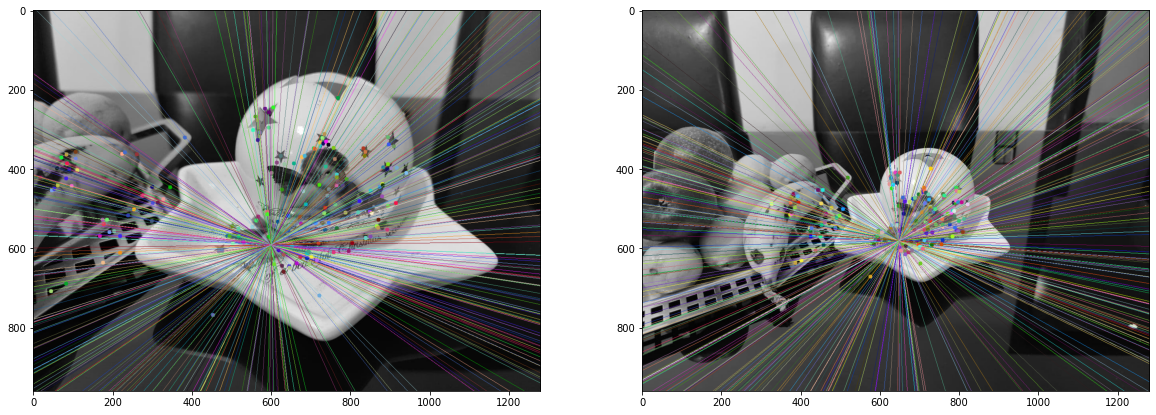

In [13]:
# Find the epipolar lines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1_3 = cv2.computeCorrespondEpilines(points2_3.reshape(-1,1,2), 2,F_3)
lines1_3 = lines1_3.reshape(-1,3)
img5_3,img6_3 = geometry.draw_epipolar_lines(img1_3,img2_3,lines1_3,points1_3,points2_3)
# Find the epipolar lines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2_3 = cv2.computeCorrespondEpilines(points1_3.reshape(-1,1,2), 1,F_3)
lines2_3 = lines2_3.reshape(-1,3)
img3_3,img4_3 = geometry.draw_epipolar_lines(img2_3,img1_3,lines2_3,points2_3,points1_3)
plt.subplot(121),plt.imshow(img5_3)
plt.subplot(122),plt.imshow(img3_3)
plt.show()

## Conclusion  
With the method used to compute the epipolar lines, we had to do a series of try and error executions until we get a result that is logical. In the training image we know that the intersection of the epipolar lines must be outside the image plane and, in the case of the left image, it should be located outside the right end. In case the right image the intersection should be outside the left end. The same has happend with image 1. In the case the image 2 we know that the epipole should be inside the image.

### References
[1]https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga49ea1a98c80a5e7d50ad4361dcf2877a  
Code available: https://github.com/JanuszJSzturo/visio_per_computador